In [8]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math as ma
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [9]:
file_name = 'KPMG_VI_New_raw_data_update_final.xlsx'
print(pd.ExcelFile(file_name).sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [10]:
df = pd.read_excel(file_name, header=1, sheet_name='CustomerDemographic', index_col=0)
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [11]:

 df.drop(['first_name', 'last_name', 'default', 'job_title','deceased_indicator'], axis=1, inplace=True)


In [12]:

df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,F,93,1953-10-12,Health,Mass Customer,Yes,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0
3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0
4,Male,33,1961-10-03,IT,Mass Customer,No,7.0
5,Female,56,1977-05-13,NaN,Affluent Customer,Yes,8.0


In [15]:
df.replace(to_replace ="F", value="Female", inplace=True)
df.replace(to_replace ="Femal", value="Female", inplace=True)



In [16]:
df.replace(to_replace ="M", value="Male", inplace=True)


In [17]:

df.replace(to_replace ="U", value="other", inplace=True)

In [18]:
df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0
3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0
4,Male,33,1961-10-03,IT,Mass Customer,No,7.0
5,Female,56,1977-05-13,NaN,Affluent Customer,Yes,8.0


In [19]:

df.replace(to_replace ="Yes", value="1", inplace=True)

In [20]:
df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
4,Male,33,1961-10-03,IT,Mass Customer,No,7.0
5,Female,56,1977-05-13,NaN,Affluent Customer,1,8.0


In [21]:
df.replace(to_replace ="No", value="0", inplace=True)

In [22]:
df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
5,Female,56,1977-05-13,NaN,Affluent Customer,1,8.0


In [23]:
df['age'] = (dt.datetime.now() - df['DOB']) / np.timedelta64(1, 'Y')


In [24]:
df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age
customer_id,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,67.740390
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.561187
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,67.466599
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,59.764867
5,Female,56,1977-05-13,NaN,Affluent Customer,1,8.0,44.156059


In [25]:
df['age_class'] = ((round(df['age'] / 10)) * 10).astype(float)

In [26]:
df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
customer_id,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,67.740390,70.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.561187,40.0
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,67.466599,70.0
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,59.764867,60.0
5,Female,56,1977-05-13,NaN,Affluent Customer,1,8.0,44.156059,40.0


In [27]:
addr_df1 = pd.read_excel(file_name, header=1, sheet_name='CustomerAddress', index_col=0)
addr_df1.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [28]:
addr_df1['state'].replace('New South Wales', 'NSW', inplace=True)
addr_df1['state'].replace('Victoria', 'VIC', inplace=True)
addr_df1_clean = addr_df1.dropna()
addr_df1_clean.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [29]:
addr_df1 = pd.merge(df, addr_df1, left_index=True, right_index=True)
addr_df1= addr_df1.dropna()
addr_df1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,67.740390,70.0,060 Morning Avenue,2016,NSW,Australia,10
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.561187,40.0,6 Meadow Vale Court,2153,NSW,Australia,10
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,59.764867,60.0,0 Holy Cross Court,4211,QLD,Australia,9
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,54.811993,50.0,9 Oakridge Court,3216,VIC,Australia,9
7,Female,6,1976-02-23,Financial Services,Affluent Customer,1,11.0,45.374428,50.0,4 Delaware Trail,2210,NSW,Australia,9


In [30]:
txns_df2 = pd.read_excel(file_name, header=1, sheet_name='Transactions', index_col=0)
txns_df2 = txns_df2.sort_values('customer_id')
txns_df2.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
transaction_id,,,,,,,,,,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
txns_df2.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], axis=1, inplace=True)

In [32]:
txns_df2.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,Unnamed: 14,Unnamed: 15
transaction_id,,,,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,NaN,NaN,NaN
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,NaN,NaN,NaN
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0,NaN,NaN,NaN
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,NaN,NaN,NaN
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,NaN,NaN,NaN


In [33]:
txns_df2.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15'], axis=1, inplace=True)

In [34]:
txns_df2.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [35]:
txns_df2.isna().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [36]:
txns_df2.duplicated().sum()

0

In [37]:
txns_df2.shape

(20000, 12)

In [38]:
txns_df2['product_first_sold_date'] = pd.TimedeltaIndex(txns_df2['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
txns_df2.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [39]:
txns_df2_clean = txns_df2.dropna()
txns_df2_clean.shape

(19445, 12)

In [40]:
txns_df2_clean['transaction_date'].describe()


count                   19445
unique                    364
top       2017-08-18 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [41]:
most_recent_purchase = txns_df2_clean['transaction_date'].max()
txns_df2_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df2_clean['transaction_date']
txns_df2_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
txns_df2_clean['profit'] = txns_df2_clean['list_price'] - txns_df2_clean['standard_cost']
txns_df2_clean.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
transaction_id,,,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [42]:
txns_df2_clean[txns_df2_clean['last_purchase_days_ago'] > 365].shape

(0, 14)

In [43]:
rfmTable = txns_df2_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

In [44]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [45]:
rfmTable.shape

(3492, 3)

In [46]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [47]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [48]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [49]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [50]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [51]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


In [52]:
addr_demo_txns = pd.merge(rfmSeg, addr_df1, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [53]:
addr_demo_txns.shape

(2851, 23)

<AxesSubplot:xlabel='r_score'>

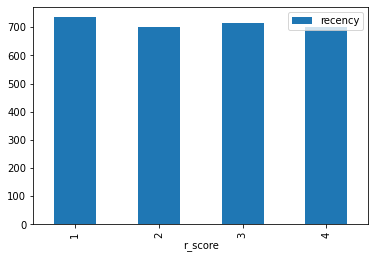

In [54]:
addr_demo_txns.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

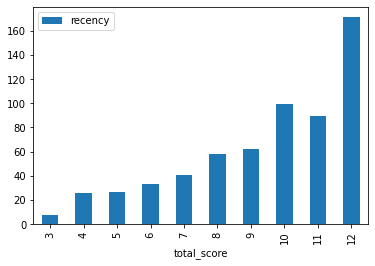

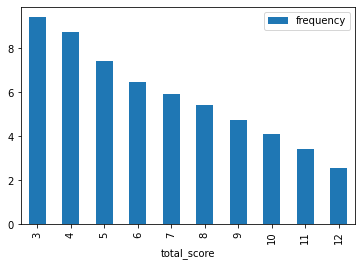

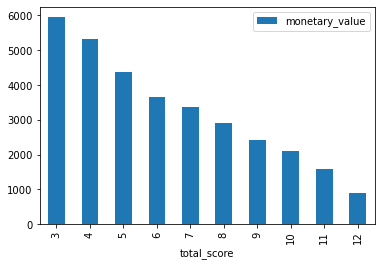

In [55]:
addr_demo_txns.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

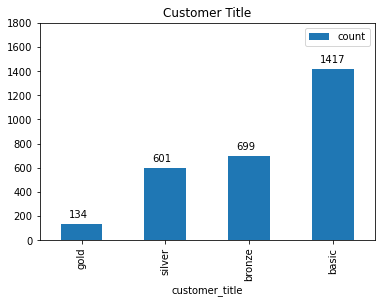

In [56]:
customer_titles_df = addr_demo_txns.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

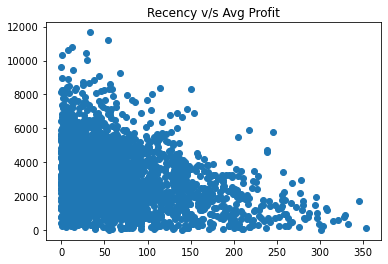

In [57]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

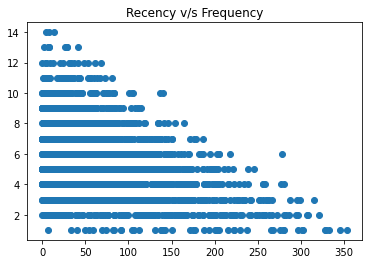

In [58]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

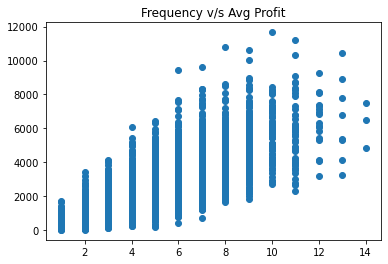

In [59]:
plt.scatter(addr_demo_txns['frequency'], addr_demo_txns['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

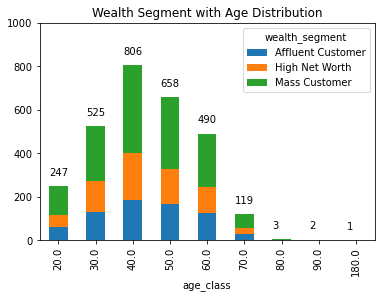

In [93]:
addr_demo_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

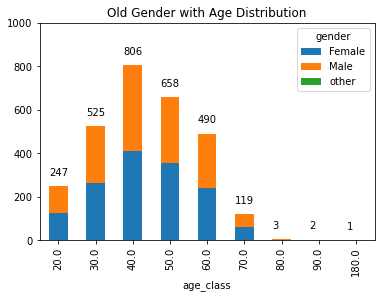

In [90]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

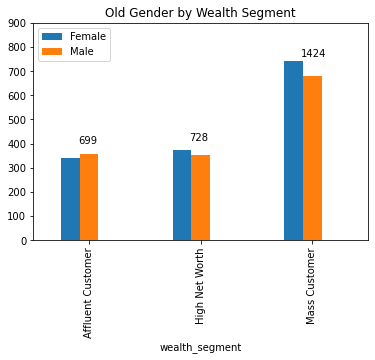

In [62]:
addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

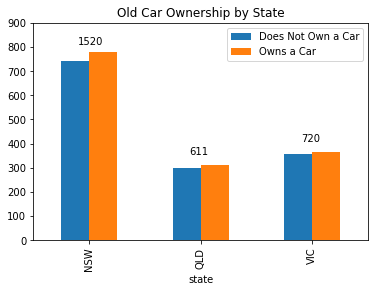

In [63]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

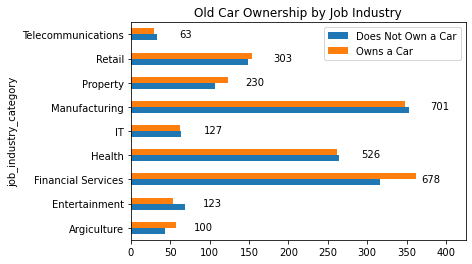

In [64]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

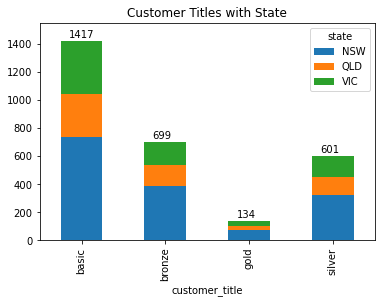

In [65]:
addr_demo_txns.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

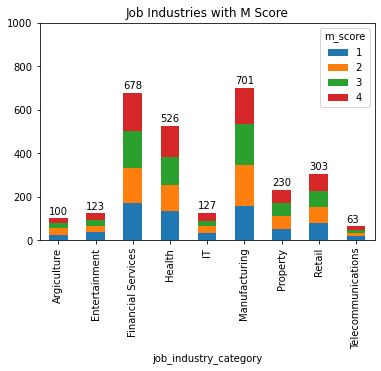

In [66]:
addr_demo_txns.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

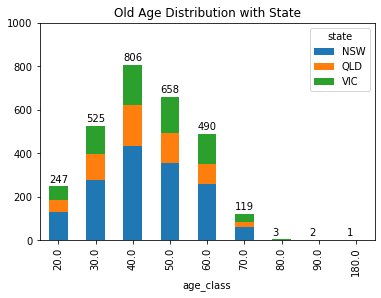

In [67]:
addr_demo_txns.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

In [68]:
c = addr_demo_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

,count
gender,
Female,69844
Male,69516
other,59


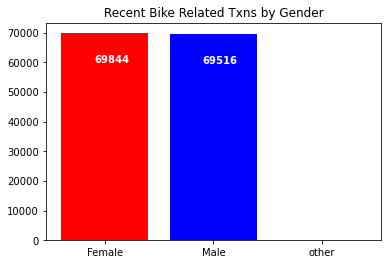

In [70]:
labels = ['Female', 'Male','other']
plt.bar(labels, c['count'], color=['red','blue','yellow'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

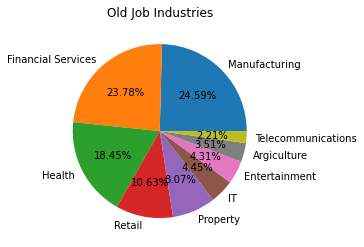

In [71]:
addr_demo_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

In [72]:
c = addr_demo_txns.groupby('customer_title').agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
customer_title,
basic,1417
bronze,699
gold,134
silver,601


In [73]:
c = addr_demo_txns.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
state customer_title       
NSW   basic             738
      bronze            389
      gold               70
      silver            323
QLD   basic             306
      bronze            146
      gold               33
      silver            126
VIC   basic             373
      bronze            164
      gold               31
      silver            152

In [74]:
c = addr_demo_txns.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,134
4,296
5,558
6,892
7,1301
8,1713
9,2111
10,2418
11,2596


In [75]:
new_cust_list = pd.read_excel(file_name, header=1, sheet_name='NewCustomerList')
new_cust_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.93,1.1625,1.453125,1.235156,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.45,0.4500,0.562500,0.478125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.05,1.0500,1.050000,1.050000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.0000,1.000000,1.000000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.46,0.4600,0.575000,0.575000,4,4,1.703125


In [76]:
new_cust_list.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [77]:
new_cust_list.duplicated().sum()

0

In [78]:
new_cust_list.shape

(1000, 23)

In [79]:
new_cust_list_clean = new_cust_list.dropna()
new_cust_list_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.93,1.1625,1.453125,1.235156,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.45,0.4500,0.562500,0.478125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.05,1.0500,1.050000,1.050000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.0000,1.000000,1.000000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.46,0.4600,0.575000,0.575000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.87,0.8700,0.870000,0.870000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.59,0.5900,0.737500,0.626875,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.67,0.8375,0.837500,0.837500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,0.903125,997,997,0.357000


In [80]:
new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)
new_cust_list_clean.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.93,1.1625,1.453125,1.235156,1,1,1.718750,63.992199,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.45,0.4500,0.562500,0.478125,1,1,1.718750,51.299262,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,1.05,1.0500,1.050000,1.050000,1,1,1.718750,46.863853,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.80,1.0000,1.000000,1.000000,4,4,1.703125,42.444871,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.46,0.4600,0.575000,0.575000,4,4,1.703125,55.797644,60


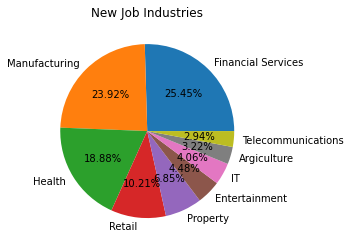

In [81]:
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

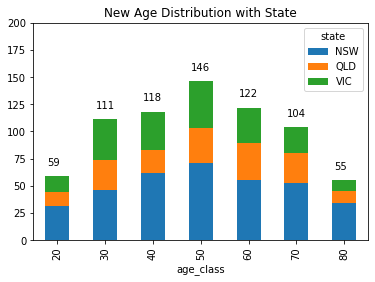

In [82]:
new_cust_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

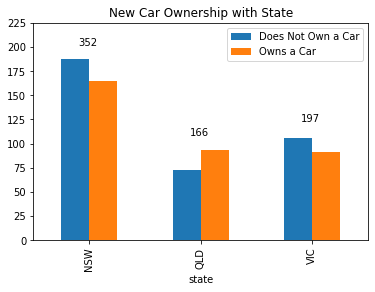

In [83]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

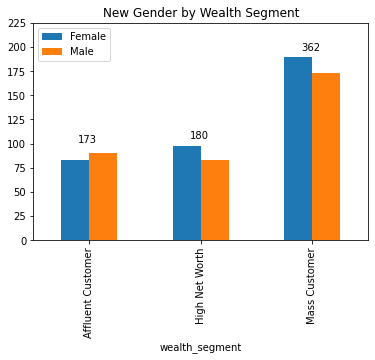

In [84]:
new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

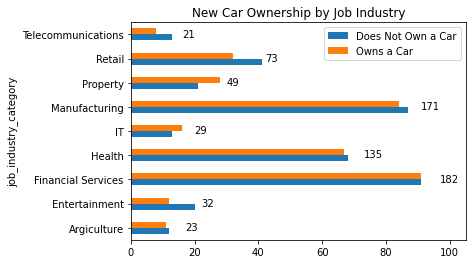

In [85]:
new_cust_list_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

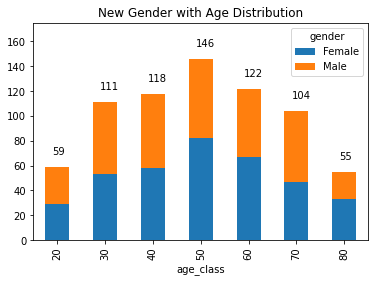

In [86]:
new_cust_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

In [87]:
addr_demo_txns['customer_segment'] = addr_demo_txns['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_demo_txns

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5,silver,Female,...,1,11.0,67.740390,70.0,060 Morning Avenue,2016,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,Male,...,1,16.0,40.561187,40.0,6 Meadow Vale Court,2153,NSW,Australia,10,Losing
4,195.0,2,220.57,4,4,4,444,12,basic,Male,...,0,7.0,59.764867,60.0,0 Holy Cross Court,4211,QLD,Australia,9,Lost
6,64.0,5,3946.55,3,2,3,323,8,basic,Male,...,1,13.0,54.811993,50.0,9 Oakridge Court,3216,VIC,Australia,9,High Risk
7,253.0,3,220.11,4,4,4,444,12,basic,Female,...,1,11.0,45.374428,50.0,4 Delaware Trail,2210,NSW,Australia,9,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,basic,Male,...,1,19.0,35.205841,40.0,2565 Caliangt Point,2171,NSW,Australia,9,Losing
3497,52.0,3,1648.32,3,4,4,344,11,basic,Female,...,1,18.0,35.183938,40.0,96 Delladonna Trail,3976,VIC,Australia,5,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,basic,Female,...,0,5.0,25.683400,30.0,3 Nova Point,3012,VIC,Australia,4,Losing


In [88]:
top_1000 = addr_demo_txns.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
3262,1.0,10,4290.81,1,1,1,111,3,gold,Male,...,0,12.0,61.736160,60.0,2558 Morningstar Center,4221,QLD,Australia,8,Platinum
2111,6.0,9,4790.82,1,1,1,111,3,gold,Male,...,1,12.0,47.529160,50.0,91933 Artisan Avenue,2753,NSW,Australia,9,Platinum
2109,2.0,8,5263.13,1,1,1,111,3,gold,Female,...,1,18.0,56.238443,60.0,7 Porter Parkway,2261,NSW,Australia,8,Platinum
1068,4.0,14,4841.71,1,1,1,111,3,gold,Male,...,1,3.0,26.302167,30.0,4297 Emmet Lane,2170,NSW,Australia,8,Platinum
1317,10.0,9,7024.71,1,1,1,111,3,gold,Male,...,1,5.0,48.471000,50.0,58563 Monterey Hill,4300,QLD,Australia,2,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,19.0,5,3802.78,2,2,3,223,7,bronze,Female,...,1,3.0,27.306979,30.0,1349 Namekagon Crossing,2134,NSW,Australia,12,Average
477,35.0,5,3375.06,2,2,3,223,7,bronze,Female,...,1,13.0,60.616356,60.0,6674 Russell Center,2197,NSW,Australia,9,Average
3132,23.0,5,3426.54,2,2,3,223,7,bronze,Male,...,1,7.0,46.234130,50.0,33794 Sommers Crossing,2502,NSW,Australia,6,Average


In [89]:
writer = pd.ExcelWriter('Book1KPMG.xlsx',
                        engine = 'xlsxwriter')
addr_demo_txns.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()